# London Housing Dataset Brief EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_london = pd.read_csv("./datasets/london_housing.csv")

df_london.head(5)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [3]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [4]:
df_london.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


In [79]:
df_london.count()

date             13549
date_ns          13549
month            13549
month_names      13549
year             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [77]:
df_london.isnull().sum()

date                0
date_ns             0
month               0
month_names         0
year                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [80]:
import seaborn as sns

<Axes: >

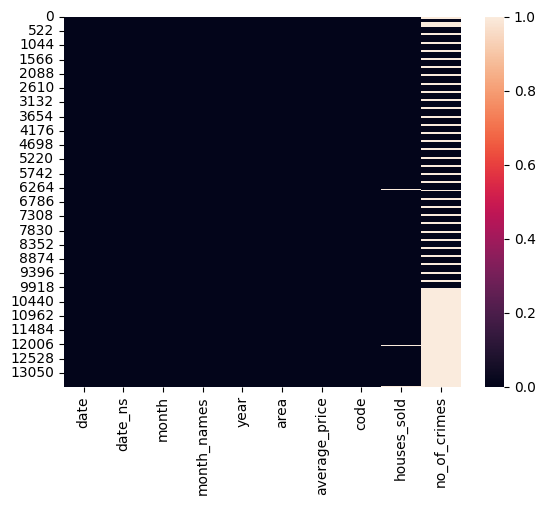

In [81]:
sns.heatmap(df_london.isnull())

## 1. Convert the Datatype of 'Date' column to Date-Time format.

In [9]:
df_london['date'].astype('datetime64[us]')

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[us]

In [14]:
df_london['date_ns'] = pd.to_datetime(df_london['date'])

In [17]:
df_london.drop('date_ns', axis=1, inplace=True)

In [18]:
df_london.insert(1, 'date_ns', pd.to_datetime(df_london['date']))

In [19]:
df_london.columns

Index(['date', 'date_ns', 'area', 'average_price', 'code', 'houses_sold',
       'no_of_crimes'],
      dtype='object')

In [20]:
df_london.sample()

,date,date_ns,area,average_price,code,houses_sold,no_of_crimes
3599,7/1/2018,2018-07-01,hackney,553833,E09000012,203.0,2749.0


## 2. Add a new column ''year'' in the dataframe, which contains years only.

In [22]:
df_london.insert(2, 'year', df_london['date_ns'].dt.year)

In [23]:
df_london.sample(5)

,date,date_ns,year,area,average_price,code,houses_sold,no_of_crimes
8391,7/1/2016,2016-07-01,2016,southwark,505216,E09000028,415.0,2791.0
4821,1/1/2020,2020-01-01,2020,havering,359188,E09000016,NaN,1679.0
12527,2/1/2010,2010-02-01,2010,london,278753,E12000007,6312.0,NaN
4599,7/1/2001,2001-07-01,2001,havering,124541,E09000016,410.0,1671.0
13218,8/1/2017,2017-08-01,2017,south west,250432,E12000009,10281.0,NaN


In [24]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  object        
 1   date_ns        13549 non-null  datetime64[ns]
 2   year           13549 non-null  int32         
 3   area           13549 non-null  object        
 4   average_price  13549 non-null  int64         
 5   code           13549 non-null  object        
 6   houses_sold    13455 non-null  float64       
 7   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 794.0+ KB


## 3. Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [27]:
df_london['date_ns'].dt.month

0         1
1         2
2         3
3         4
4         5
         ..
13544     9
13545    10
13546    11
13547    12
13548     1
Name: date_ns, Length: 13549, dtype: int32

In [30]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

In [31]:
df_london.insert(2, 'month', df_london['date_ns'].dt.month)

In [32]:
df_london.columns

Index(['date', 'date_ns', 'month', 'year', 'area', 'average_price', 'code',
       'houses_sold', 'no_of_crimes'],
      dtype='object')

In [33]:
df_london.insert(3, 'month_names', df_london['month'].map(months))

In [36]:
df_london.sample(5)

,date,date_ns,month,month_names,year,area,average_price,code,houses_sold,no_of_crimes
1166,12/1/2016,2016-12-01,12,December,2016,bexley,331025,E09000004,261.0,1240.0
12088,8/1/1998,1998-08-01,8,August,1998,east of england,71126,E12000006,11236.0,NaN
4941,12/1/2004,2004-12-01,12,December,2004,hillingdon,222273,E09000017,349.0,2375.0
2844,1/1/2006,2006-01-01,1,January,2006,enfield,214069,E09000010,422.0,2205.0
8973,12/1/2014,2014-12-01,12,December,2014,tower hamlets,404511,E09000030,334.0,2245.0


## 4. Remove the columns 'year' and 'month' from the dataframe.

In [39]:
df_london.drop(['month', 'year'], axis=1)

# remove permanently
# df_london.drop(['month', 'year'], axis=1, inplace=True)

,date,date_ns,month_names,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,1995-01-01,January,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,1995-02-01,February,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,1995-03-01,March,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,1995-04-01,April,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,1995-05-01,May,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...,...,...
13544,9/1/2019,2019-09-01,September,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,2019-10-01,October,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,2019-11-01,November,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,2019-12-01,December,england,250410,E92000001,NaN,NaN


In [40]:
df_london.head()

,date,date_ns,month,month_names,year,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,1995-01-01,1,January,1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,1995-02-01,2,February,1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,1995-03-01,3,March,1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,1995-04-01,4,April,1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,1995-05-01,5,May,1995,city of london,84409,E09000001,10.0,NaN


## 5. Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [47]:
df_london[df_london['no_of_crimes'] == 0].count()

date             104
date_ns          104
month            104
month_names      104
year             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [48]:
len(df_london[df_london['no_of_crimes'] == 0])

104

## 6. What is the maximum & minimum 'average_price' per year in england ?

In [61]:
df_london['average_price'].groupby(df_london['year']).sum().sort_values(ascending=False)

year
2017    253788627
2018    252309964
2019    248430596
2016    245637609
2015    227532294
2014    209632532
2013    180678365
2012    167081131
2011    159202335
2010    155281949
2008    155238645
2007    154409911
2009    140020324
2006    134623679
2005    125989837
2004    121286549
2003    110753759
2002     98382995
2001     84743472
2000     75588899
1999     61698333
1998     55146914
1997     48393909
1996     42750399
1995     40975327
2020     20849849
Name: average_price, dtype: int64

In [65]:
df_london.pivot_table(index='year', 
                      values='average_price', 
                      aggfunc='sum').sort_values(by='average_price', ascending=False,)

,average_price
year,
2017,253788627
2018,252309964
2019,248430596
2016,245637609
2015,227532294
2014,209632532
2013,180678365
2012,167081131
2011,159202335


In [87]:
df_london[df_london['area'] == 'england'][['year', 'average_price']]

,year,average_price
13248,1995,53203
13249,1995,53096
13250,1995,53201
13251,1995,53591
13252,1995,53678
...,...,...
13544,2019,249942
13545,2019,249376
13546,2019,248515
13547,2019,250410


In [91]:
df_london_england = df_london[df_london['area'] == 'england']

In [94]:
df_london_england.groupby('year')['average_price'].sum().sort_values(ascending=False)

year
2019    2965213
2018    2940220
2017    2857934
2016    2728046
2015    2534097
2014    2373253
2007    2280307
2013    2190977
2008    2188559
2012    2129856
2010    2129672
2011    2102760
2006    2092218
2009    1998704
2005    1962840
2004    1827773
2003    1562623
2002    1295778
2001    1083681
2000     969772
1999     840849
1998     771620
1997     709928
1996     649818
1995     639869
2020     247355
Name: average_price, dtype: int64

In [95]:
df_london_england.groupby('year')['average_price'].mean().sort_values(ascending=False)

year
2020    247355.000000
2019    247101.083333
2018    245018.333333
2017    238161.166667
2016    227337.166667
2015    211174.750000
2014    197771.083333
2007    190025.583333
2013    182581.416667
2008    182379.916667
2012    177488.000000
2010    177472.666667
2011    175230.000000
2006    174351.500000
2009    166558.666667
2005    163570.000000
2004    152314.416667
2003    130218.583333
2002    107981.500000
2001     90306.750000
2000     80814.333333
1999     70070.750000
1998     64301.666667
1997     59160.666667
1996     54151.500000
1995     53322.416667
Name: average_price, dtype: float64

## 7. What is the Maximum & Minimum No. of Crimes recorded per area ?

In [66]:
df_london.columns

Index(['date', 'date_ns', 'month', 'month_names', 'year', 'area',
       'average_price', 'code', 'houses_sold', 'no_of_crimes'],
      dtype='object')

In [67]:
df_london.dtypes

date                     object
date_ns          datetime64[ns]
month                     int32
month_names              object
year                      int32
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [69]:
df_london.groupby('area')['no_of_crimes'].sum().sort_values(ascending=False)

area
westminster               1211743.0
lambeth                    719454.0
camden                     699955.0
southwark                  693541.0
newham                     652978.0
croydon                    607524.0
ealing                     597017.0
hackney                    589847.0
tower hamlets              582176.0
islington                  576162.0
brent                      553173.0
haringey                   551072.0
lewisham                   525889.0
barnet                     521763.0
wandsworth                 506025.0
greenwich                  493472.0
hillingdon                 490465.0
waltham forest             484014.0
enfield                    475844.0
hounslow                   467213.0
bromley                    462610.0
redbridge                  444370.0
hammersmith and fulham     438461.0
kensington and chelsea     419808.0
barking and dagenham       366234.0
havering                   350452.0
bexley                     297576.0
harrow                 

In [71]:
df_london.pivot_table(index='area', 
                      values='no_of_crimes',
                      aggfunc='sum').sort_values(by='no_of_crimes', ascending=False)

,no_of_crimes
area,
westminster,1211743.0
lambeth,719454.0
camden,699955.0
southwark,693541.0
newham,652978.0
croydon,607524.0
ealing,597017.0
hackney,589847.0
tower hamlets,582176.0


## 8. Show the total count of records of each area, where average price is less than 100000.

In [76]:
len(df_london[df_london['average_price'] < 100000])

2209

In [74]:
df_london[df_london['average_price'] < 100000]['area'].count()

2209

In [75]:
df_london[df_london['average_price'] < 100000]['area'].value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         

In [96]:
df_london.sample(10)

,date,date_ns,month,month_names,year,area,average_price,code,houses_sold,no_of_crimes
5303,1/1/2010,2010-01-01,1,January,2010,hounslow,250675,E09000018,163.0,1691.0
4294,3/1/2001,2001-03-01,3,March,2001,harrow,161573,E09000015,343.0,1406.0
1034,12/1/2005,2005-12-01,12,December,2005,bexley,187080,E09000004,335.0,1510.0
232,5/1/2014,2014-05-01,5,May,2014,city of london,682663,E09000001,22.0,NaN
9168,2/1/2006,2006-02-01,2,February,2006,waltham forest,201812,E09000031,327.0,2184.0
1606,6/1/2003,2003-06-01,6,June,2003,bromley,215302,E09000006,505.0,2408.0
1859,6/1/1999,1999-06-01,6,June,1999,camden,185845,E09000007,367.0,NaN
10984,12/1/2006,2006-12-01,12,December,2006,north west,143832,E12000002,15679.0,NaN
7738,4/1/2012,2012-04-01,4,April,2012,redbridge,262919,E09000026,176.0,1758.0
7246,5/1/1996,1996-05-01,5,May,1996,newham,54651,E09000025,279.0,NaN
